In [37]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [4]:
df = pd.read_csv('../../99_raw_data/sample1.csv',index_col=['date'])
df

,a,b,y
date,,,
2021-01-01,1,21,4
2021-01-02,2,22,5
2021-01-03,3,23,6
2021-01-04,4,24,7
2021-01-05,5,25,8
...,...,...,...
2021-04-06,96,116,99
2021-04-07,97,117,100
2021-04-08,98,118,101


In [5]:
from data_split import *

In [17]:
x,y = make_dataset(df.loc[:,['a','b']], df.loc[:,['a']],4)

In [24]:
print("x.shape => ",x.shape, "y.shape => ",y.shape)

x.shape =>  (96, 4, 2) y.shape =>  (96, 1)


In [25]:
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(4,2)))
model.add(Dense(units=10))
model.add(Dense(units=1))
model.compile(loss='mse',optimizer='adam')
model.fit(x,y, epochs=30)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-13 13:38:10.133271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-13 13:38:10.133399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-13 13:38:10.345582: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-12-13 13:38:10.579037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 15ms/step - loss: 3460.5933
Epoch 2/30
3/3 [==============================] - 0s 14ms/step - loss: 2167.0115
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 1223.9346
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 595.8298
Epoch 5/30
3/3 [==============================] - 0s 17ms/step - loss: 195.2019
Epoch 6/30
3/3 [==============================] - 0s 16ms/step - loss: 32.0681
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 9.0081
Epoch 8/30
3/3 [==============================] - 0s 15ms/step - loss: 53.1355
Epoch 9/30
3/3 [==============================] - 0s 15ms/step - loss: 87.1433
Epoch 10/30
3/3 [==============================] - 0s 15ms/step - loss: 86.9318
Epoch 11/30
3/3 [==============================] - 0s 15ms/step - loss: 61.0328
Epoch 12/30
3/3 [==============================] - 0s 15ms/step - loss: 31.1036
Epoch 13/30
3/3 [==============================] - 0s

In [31]:
test=np.array(
    [[29,49],
     [30,50],
     [31,51],
     [32,52]]
)

In [32]:
test.reshape(1,4,2)

(4, 2)

In [33]:
model.predict(test.reshape(1,4,2))

1/1 [==============================] - 0s 108ms/step


2022-12-13 13:39:56.840896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[32.46616]], dtype=float32)

In [35]:
y_pred=model.predict(x)

3/3 [==============================] - 0s 6ms/step


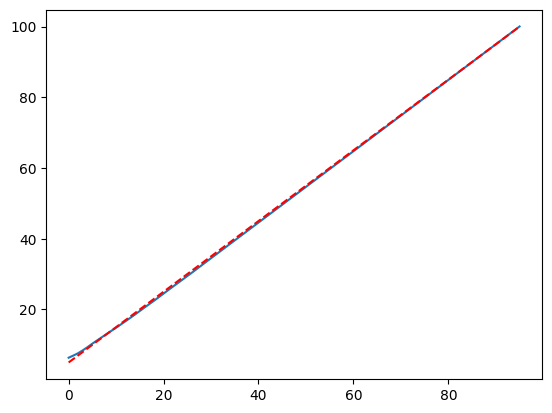

In [38]:
plt.plot(y_pred)
plt.plot(y,'--r')

In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

x.shape =>  (96, 4, 2) y.shape =>  (96, 2)
Epoch 1/50
3/3 [==============================] - 0s 14ms/step - loss: 7045.6221
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 5328.1646

2022-12-13 13:45:33.115349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 17ms/step - loss: 5210.4619
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 3824.8823
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 2645.1582
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 1784.9612
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 1209.9766
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 738.9968
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 360.5486
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 130.0740
Epoch 10/50
3/3 [==============================] - 0s 16ms/step - loss: 29.0606
Epoch 11/50
3/3 [==============================] - 0s 16ms/step - loss: 36.2678
Epoch 12/50
3/3 [==============================] - 0s 15ms/step - loss: 85.0209
Epoch 13/50
3/3 [==============================] - 0s 16ms/step - loss: 117.5675
Epoch 14/50
3/3 [============================

2022-12-13 13:45:35.601589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


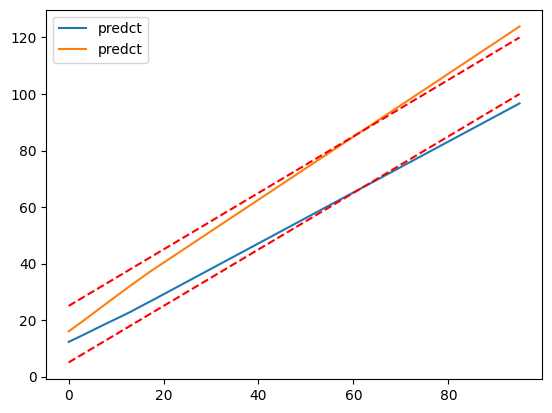

In [43]:
x,y = make_dataset(df.loc[:,['a','b']], df.loc[:,['a','b']],4)
print("x.shape => ",x.shape, "y.shape => ",y.shape)

model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(4,2)))
model.add(Dense(units=10))
model.add(Dense(units=2))
model.compile(loss='mse',optimizer='adam')
model.fit(x,y, epochs=50)

test=np.array(
    [[29,49],
     [30,50],
     [31,51],
     [32,52]]
)
test.reshape(1,4,2)
my_pred=model.predict(test.reshape(1,4,2))
y_pred=model.predict(x)
plt.plot(y_pred,label = 'predct')
plt.plot(y,'--r')
plt.legend()
plt.show()

In [44]:
my_pred

array([[36.338646, 49.232937]], dtype=float32)